#Assignment 07: Sequence Modeling

This Week's assignment is to train sequence models on the `Emoji Data` to classify the sentences emotion. You'll be creating models that takes in a sentence and predicts the appropriate emoji that describes the sentiment.

Before starting copy this file and work on your own copy by following the below steps: <br>
`File > Save Copy in Drive`. Then add your name to the file (e.g., Assignment 07: Sequence Modeling - Zahraa Dhafer).

**DATASET**
The dataset consists of two csv files, a training file with 16k rows and a testing file with 2k rows, each row has 3 columns, the sentence, the emotion as text (meant to provide description to the emoji and not to be used in training/testing) and the emoji symbol (e.g. 😄, 😡, 😍).<br><br>
**Submission Deadline: Thursday, 3/3/2022 at 3:00 PM**

**Requirements:**
1. Set TensorFlow's random seed to 42.
2. Import all necessary libraries for the sequence modeling project.
3. Download the dataset (the link is provided below).
4. Read data from CSV files and split it into inputs and targets (no need to do train_test_split as the data is already split).
**Note**: Read both Train and Test files
5. Tokenize and pad the text, use a vocabulary size of 10,000 and maximum sequence length of 64.
6. Do the appropriate operations on the targets to prepare them for training.
7. Define the sequential models, make sure to use RNN,LSTM,GRU and DNN with Embedding layers using Bidirectional LSTM if necessary. The training and validation accuracy should be at least 94% and 88% respectively.
8. Use Adam optimizer and the appropriate loss function and metrics to compile the model.
9. Use ModelCheckpoint callback to save the models at the epoch with the best validation accuracy, each model file should have your name (e.g. for Zahraa Dhafer, the model's file name would be "LSTM_Zahraa_D.h5). Make sure to download the model file as it will be a part of your assignment submission. <br>[ModelCheckpoint documentation](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ModelCheckpoint)
10. Plot the models metrics.




**HINTS:**
Set the new hyperparameters like vocabulary size, input length (i.e. max sequence length) in a separate cell after the import cell in your notebook (failing to do so will affect your style score)

**Note:** To get the best performance from the model, manually tune the hyperparameters of each model. 

Find relevant links below:<br>

[Assignment Colab File](https://colab.research.google.com/drive/129V6jlMgzfOWi033t7xIgdn0ZKRvnjP-?usp=sharing)<br>
[Dataset](https://drive.google.com/drive/folders/1i7LmIH7sJHSARAMXgznBqXZ82tzMhYiL?usp=sharing)

[Submission Form](https://docs.google.com/forms/d/e/1FAIpQLSff0OH5akQLPw7LArOYwXwVvJVHtQSgKGnfxlpI8OL-NBUrcg/viewform?usp=pp_url)<br>


Good luck and feel free to ask any questions in the or on the Questions channel.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 1- Import all necessary libraries for the sequence modeling project

In [ ]:
# write your code below
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing,metrics

import string
import re
import seaborn as sn
import glob

In [ ]:
tf.random.set_seed(42)

# 2- Download the dataset

In [ ]:
# write your code below
!gdown --id 1XdXqB-h7TQOxeX85IXf4pTQIAdryD0Mh
!gdown --id 1-yhsvHHsGJwpCTPpg5aAS4u_3R0Hh2Qs

Downloading...
From: https://drive.google.com/uc?id=1XdXqB-h7TQOxeX85IXf4pTQIAdryD0Mh
To: /content/train.csv
100% 1.74M/1.74M [00:00<00:00, 157MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-yhsvHHsGJwpCTPpg5aAS4u_3R0Hh2Qs
To: /content/test.csv
100% 217k/217k [00:00<00:00, 87.2MB/s]


# 3- Read data from CSV files and split it into inputs and targets 

**Note**: no need to do train_test_split as the data is already split

In [ ]:
# write your code below
data_train=pd.read_csv('/content/train.csv')
data_test=pd.read_csv('/content/test.csv')


In [ ]:
emo=data_train.emoji
output_uniqe=set(emo)
output_index=[]
for index in range (len(output_uniqe)):
  output_index.append(index)
print(output_index)
print(output_uniqe)

label_indx_output=dict(zip(output_uniqe,output_index))
indx_label_output=dict(zip(output_index,output_uniqe))
print(label_indx_output)
print(indx_label_output)

data_train.emoji=data_train.emoji.map(label_indx_output)
print(data_train)
data_test.emoji=data_test.emoji.map(label_indx_output)
print(data_test)

[0, 1, 2, 3, 4, 5]
{'😍', '😲', '😄', '😢', '😡', '😨'}
{'😍': 0, '😲': 1, '😄': 2, '😢': 3, '😡': 4, '😨': 5}
{0: '😍', 1: '😲', 2: '😄', 3: '😢', 4: '😡', 5: '😨'}
                                                    text  emotion  emoji
0                                i didnt feel humiliated  sadness      3
1      i can go from feeling so hopeless to so damned...  sadness      3
2       im grabbing a minute to post i feel greedy wrong    anger      4
3      i am ever feeling nostalgic about the fireplac...     love      0
4                                   i am feeling grouchy    anger      4
...                                                  ...      ...    ...
15995  i just had a very brief time in the beanbag an...  sadness      3
15996  i am now turning and i feel pathetic that i am...  sadness      3
15997                     i feel strong and good overall      joy      2
15998  i feel like this was such a rude comment and i...    anger      4
15999  i know a lot but i feel so stupid because 

In [ ]:
datasets = [data_train, data_test]

for dataset in datasets:
  dataset = dataset.drop('emotion', axis=1,inplace=True)

In [ ]:
print(np.bincount(data_train.emoji))
print(indx_label_output)

[1304  572 5362 4666 2159 1937]
{0: '😍', 1: '😲', 2: '😄', 3: '😢', 4: '😡', 5: '😨'}


In [ ]:
data_train[data_train.emoji==3]

,text,emoji
0,i didnt feel humiliated,3
1,i can go from feeling so hopeless to so damned...,3
5,ive been feeling a little burdened lately wasn...,3
10,i feel like i have to make the suffering i m s...,3
13,i feel low energy i m just thirsty,3
...,...,...
15988,i feel pathetic because im still single,3
15991,i have wanted to perhaps convey my feelings of...,3
15995,i just had a very brief time in the beanbag an...,3
15996,i am now turning and i feel pathetic that i am...,3


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fab14be9150>]],
      dtype=object)

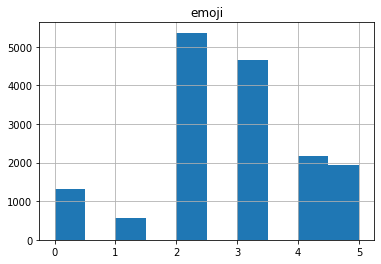

In [ ]:
data_train.hist()



In [ ]:
data_train


,text,emoji
0,i didnt feel humiliated,3
1,i can go from feeling so hopeless to so damned...,3
2,im grabbing a minute to post i feel greedy wrong,4
3,i am ever feeling nostalgic about the fireplac...,0
4,i am feeling grouchy,4
...,...,...
15995,i just had a very brief time in the beanbag an...,3
15996,i am now turning and i feel pathetic that i am...,3
15997,i feel strong and good overall,2
15998,i feel like this was such a rude comment and i...,4


In [ ]:
input_train=data_train.text
output_train=data_train.emoji
input_test=data_test.text
output_test=data_test.emoji

In [ ]:
input_train 

0                                  i didnt feel humiliated
1        i can go from feeling so hopeless to so damned...
2         im grabbing a minute to post i feel greedy wrong
3        i am ever feeling nostalgic about the fireplac...
4                                     i am feeling grouchy
                               ...                        
15995    i just had a very brief time in the beanbag an...
15996    i am now turning and i feel pathetic that i am...
15997                       i feel strong and good overall
15998    i feel like this was such a rude comment and i...
15999    i know a lot but i feel so stupid because i ca...
Name: text, Length: 16000, dtype: object

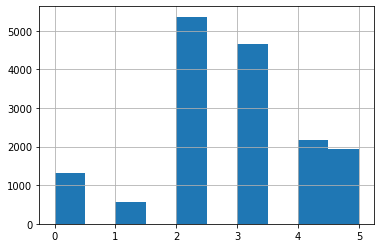

In [ ]:
output_train.hist()

#4- Tokenize and pad the text, use a vocabulary size of 10,000 and maximum sequence length of 64

### *Text Clean Up*

In [ ]:
def clean_text(text):
    
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = " ".join(filter(lambda x:x[0]!="@", text.split()))
    return text
input_train = input_train.apply(clean_text)
input_test = input_test.apply(clean_text)

### *Tokenization*

In [ ]:
# write your code below
voc=10000
text_tok=tf.keras.preprocessing.text.Tokenizer(num_words=voc,oov_token='<OOV>',
                                            filters='!"#$%&()*+,-./:;=?@[\\]^_`{|}~\t\n')
text_tok.fit_on_texts(input_train)

input_train_tok=text_tok.texts_to_sequences(input_train)
input_test_tok=text_tok.texts_to_sequences(input_test)
print(input_train_tok[0])
for token in input_train_tok[0]:
  print(text_tok.index_word[token],end=' ')

[2, 139, 3, 679]
i didnt feel humiliated 

### *Padding*

In [ ]:
padding_train=tf.keras.preprocessing.sequence.pad_sequences(input_train_tok
                                                      ,maxlen=64
                                                      ,padding='post'
                                                      ,truncating='post')
padding_test=tf.keras.preprocessing.sequence.pad_sequences(input_test_tok
                                                      ,maxlen=64
                                                      ,padding='post'
                                                      ,truncating='post')


#5-Data pipbline

In [ ]:
def data_create(x,y):
  data=tf.data.Dataset.from_tensor_slices((x,y))
  data=data.shuffle(1024)
  data= data.batch(batch_size=64)
  data=data.prefetch(tf.data.AUTOTUNE)
  return data


datatrain=data_create(padding_train,output_train)
datatest=data_create(padding_test,output_test)

In [ ]:
for input,output in datatrain.take(1):
  print(input[0])
  print(output[0])

tf.Tensor(
[   2   39   26    3  511   35 3518    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0], shape=(64,), dtype=int32)
tf.Tensor(5, shape=(), dtype=int64)


#6- Modeling:
Define the sequential models, make sure to use RNN,LSTM,GRU and DNN with Embedding layers using Bidirectional LSTM if necessary. The training and validation accuracy should be at least 94% and 88% respectively

###DNN

In [ ]:
tf.keras.backend.clear_session()
model_Dnn = tf.keras.Sequential([
                             
                    tf.keras.layers.Input(shape=(64,)),
                    tf.keras.layers.Embedding(input_dim=voc+1,output_dim=64,mask_zero=True),
                    tf.keras.layers.Flatten(),
                    tf.keras.layers.Dense(units=512,activation='leaky_relu'),
                    tf.keras.layers.Dropout(0.3),
                    tf.keras.layers.Dense(units=6,activation='softmax')

                             

])
model_Dnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 64, 64)            640064    
                                                                 
 flatten (Flatten)           (None, 4096)              0         
                                                                 
 dense (Dense)               (None, 512)               2097664   
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 6)                 3078      
                                                                 
Total params: 2,740,806
Trainable params: 2,740,806
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# write your code below
bestdnn_model=tf.keras.callbacks.ModelCheckpoint('/content/drive/MyDrive/My_Models/ModelDnn_Mohammed_Maher.h5',
                                                monitor='val_acc',
                                                save_best_only=True)
model_Dnn.compile(optimizer=tf.optimizers.Adam(),
                  loss=tf.losses.SparseCategoricalCrossentropy(),
                  metrics=['acc'])
model_Dnn.fit(datatrain,epochs=6,validation_data=datatest, callbacks=[bestdnn_model])


Epoch 1/6
250/250 [==============================] - 3s 9ms/step - loss: 1.2612 - acc: 0.5276 - val_loss: 0.6213 - val_acc: 0.7975
Epoch 2/6
250/250 [==============================] - 2s 8ms/step - loss: 0.2933 - acc: 0.9044 - val_loss: 0.4487 - val_acc: 0.8580
Epoch 3/6
250/250 [==============================] - 2s 8ms/step - loss: 0.0697 - acc: 0.9808 - val_loss: 0.4771 - val_acc: 0.8575
Epoch 4/6
250/250 [==============================] - 2s 8ms/step - loss: 0.0338 - acc: 0.9920 - val_loss: 0.5427 - val_acc: 0.8555
Epoch 5/6
250/250 [==============================] - 2s 8ms/step - loss: 0.0264 - acc: 0.9939 - val_loss: 0.5518 - val_acc: 0.8605
Epoch 6/6
250/250 [==============================] - 2s 7ms/step - loss: 0.0211 - acc: 0.9949 - val_loss: 0.6005 - val_acc: 0.8555


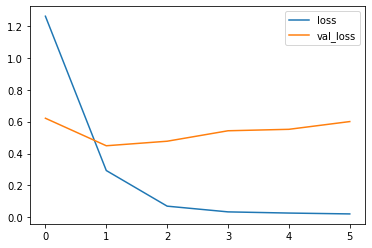

In [ ]:
history_model_Dnn = pd.DataFrame(model_Dnn.history.history)
history_model_Dnn[['loss', 'val_loss']].plot.line()

accuracy_score: 0.8555


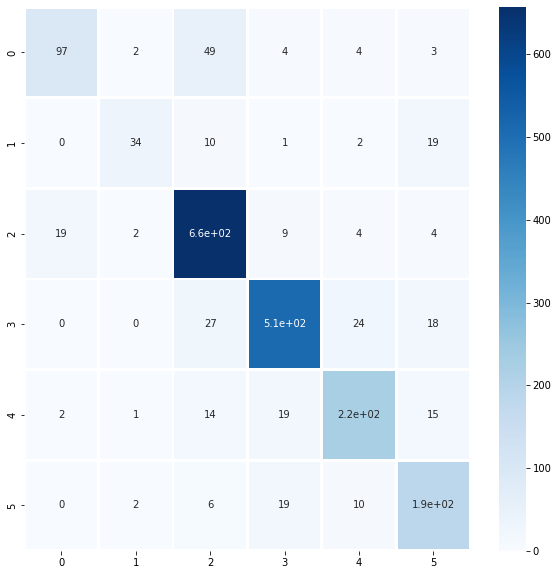

In [ ]:
pred_model_Dnn = np.argmax(model_Dnn.predict(padding_test), -1)
print(f'accuracy_score: {metrics.accuracy_score(output_test, pred_model_Dnn)}')
plt.figure(figsize=(10,10))


sn.heatmap(metrics.confusion_matrix(output_test, pred_model_Dnn), cmap='Blues', annot=True, linewidths=2)

##RNN

###RNN

In [ ]:
tf.keras.backend.clear_session()
rnn_model=tf.keras.Sequential([
                
      tf.keras.layers.Input(shape=(64,)),
      tf.keras.layers.Embedding(input_dim=voc+1,output_dim=64,mask_zero=True),
      tf.keras.layers.SimpleRNN(128,activation='tanh'),
      tf.keras.layers.Dense(6,activation='softmax')
])

In [ ]:
bestRnn_model=tf.keras.callbacks.ModelCheckpoint('/content/drive/MyDrive/My_Models/ModelRnn_Mohammed_Maher.h5',
                                                monitor='val_acc',
                                                save_best_only=True)
# write your code below
rnn_model.compile(optimizer=tf.optimizers.Adam(),
                  loss=tf.losses.SparseCategoricalCrossentropy(),
                  metrics=['acc'])
rnn_model.fit(datatrain,epochs=6,validation_data=datatest,callbacks=[bestRnn_model])


Epoch 1/6
250/250 [==============================] - 35s 137ms/step - loss: 1.5601 - acc: 0.3706 - val_loss: 1.4067 - val_acc: 0.4920
Epoch 2/6
250/250 [==============================] - 34s 136ms/step - loss: 0.9072 - acc: 0.6928 - val_loss: 0.7469 - val_acc: 0.7580
Epoch 3/6
250/250 [==============================] - 33s 133ms/step - loss: 0.3767 - acc: 0.8781 - val_loss: 0.6424 - val_acc: 0.7800
Epoch 4/6
250/250 [==============================] - 33s 134ms/step - loss: 0.1798 - acc: 0.9441 - val_loss: 0.6876 - val_acc: 0.7945
Epoch 5/6
250/250 [==============================] - 33s 131ms/step - loss: 0.0934 - acc: 0.9737 - val_loss: 0.6711 - val_acc: 0.8115
Epoch 6/6
250/250 [==============================] - 32s 128ms/step - loss: 0.0752 - acc: 0.9784 - val_loss: 0.7488 - val_acc: 0.7880


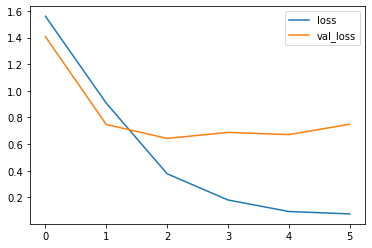

In [ ]:
history_rnn_model = pd.DataFrame(rnn_model.history.history)
history_rnn_model[['loss', 'val_loss']].plot.line()

accuracy_score: 0.788


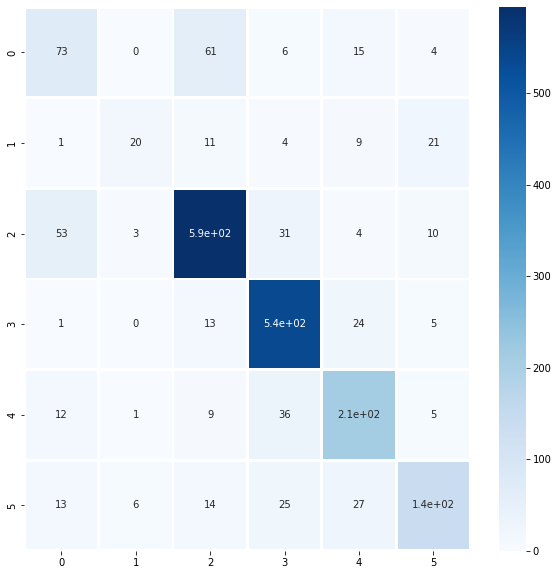

In [ ]:
pred_rnn_model = np.argmax(rnn_model.predict(padding_test), -1)
print(f'accuracy_score: {metrics.accuracy_score(output_test, pred_rnn_model)}')
plt.figure(figsize=(10,10))


sn.heatmap(metrics.confusion_matrix(output_test, pred_rnn_model), cmap='Blues', annot=True, linewidths=2)

###Deep-RNN

In [ ]:
tf.keras.backend.clear_session()
rnn_deep_model=tf.keras.Sequential([
                
      tf.keras.layers.Input(shape=(64,)),
      tf.keras.layers.Embedding(input_dim=voc+1,output_dim=64,mask_zero=True),
      tf.keras.layers.SimpleRNN(128,activation='tanh',return_sequences=True),
      tf.keras.layers.SimpleRNN(64,activation='tanh'),
      tf.keras.layers.Dense(6,activation='softmax')
])

In [ ]:
bestRnnDeep_model=tf.keras.callbacks.ModelCheckpoint('/content/drive/MyDrive/My_Models/ModeldeepRnn_Mohammed_Maher.h5',
                                                monitor='val_acc',
                                                save_best_only=True)
# write your code below
rnn_deep_model.compile(optimizer=tf.optimizers.Adam(),
                  loss=tf.losses.SparseCategoricalCrossentropy(),
                  metrics=['acc'])
rnn_deep_model.fit(datatrain,epochs=6,validation_data=datatest,callbacks=[bestRnnDeep_model])


Epoch 1/6
250/250 [==============================] - 64s 248ms/step - loss: 1.5650 - acc: 0.3643 - val_loss: 1.3418 - val_acc: 0.5175
Epoch 2/6
250/250 [==============================] - 62s 247ms/step - loss: 0.8110 - acc: 0.7139 - val_loss: 0.6585 - val_acc: 0.7935
Epoch 3/6
250/250 [==============================] - 63s 254ms/step - loss: 0.3798 - acc: 0.8756 - val_loss: 0.5919 - val_acc: 0.8075
Epoch 4/6
250/250 [==============================] - 62s 248ms/step - loss: 0.2356 - acc: 0.9239 - val_loss: 0.6360 - val_acc: 0.7975
Epoch 5/6
250/250 [==============================] - 63s 252ms/step - loss: 0.1305 - acc: 0.9603 - val_loss: 0.6719 - val_acc: 0.8005
Epoch 6/6
250/250 [==============================] - 62s 248ms/step - loss: 0.1843 - acc: 0.9402 - val_loss: 0.7023 - val_acc: 0.7975


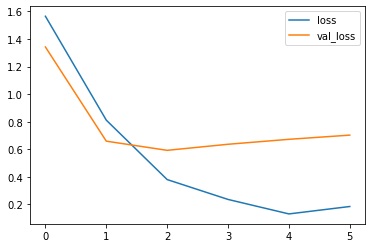

In [ ]:
history_rnn_deep = pd.DataFrame(rnn_deep_model.history.history)
history_rnn_deep[['loss', 'val_loss']].plot.line()

accuracy_score: 0.7975


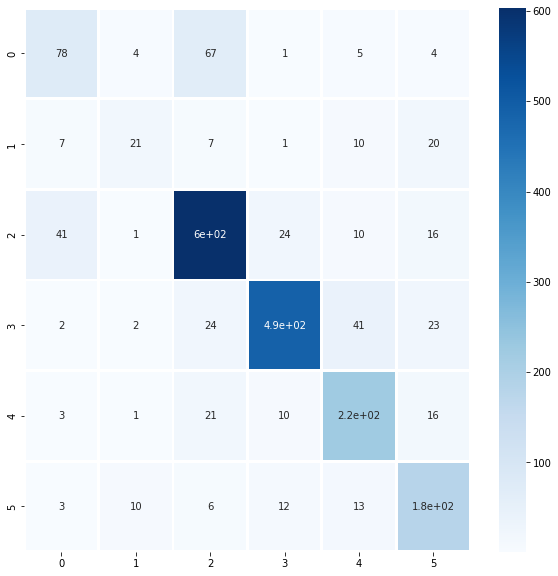

In [ ]:
pred_rnn_deep = np.argmax(rnn_deep_model.predict(padding_test), -1)
print(f'accuracy_score: {metrics.accuracy_score(output_test, pred_rnn_deep)}')
plt.figure(figsize=(10,10))


sn.heatmap(metrics.confusion_matrix(output_test, pred_rnn_deep), cmap='Blues', annot=True, linewidths=2)

##LSTM 

###Bi-LSTM

In [ ]:
tf.keras.backend.clear_session()
model_bidir_lstm = tf.keras.Sequential([
                             tf.keras.layers.Embedding(input_dim=voc+1,output_dim=64,mask_zero=True,
                                                       input_shape=[None]),
                             tf.keras.layers.Bidirectional( tf.keras.layers.LSTM(units=300,return_sequences=True)),
                             tf.keras.layers.LSTM(200,return_sequences=True),
                             tf.keras.layers.LSTM(300),
                             tf.keras.layers.Dense(6,activation='softmax')

                             

])
model_bidir_lstm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 64)          640064    
                                                                 
 bidirectional (Bidirectiona  (None, None, 600)        876000    
 l)                                                              
                                                                 
 lstm_1 (LSTM)               (None, None, 200)         640800    
                                                                 
 lstm_2 (LSTM)               (None, 300)               601200    
                                                                 
 dense (Dense)               (None, 6)                 1806      
                                                                 
Total params: 2,759,870
Trainable params: 2,759,870
Non-trainable params: 0
______________________________________________

In [ ]:
bestbilstm_model=tf.keras.callbacks.ModelCheckpoint('/content/drive/MyDrive/My_Models/ModelBiLstm_Mohammed_Maher.h5',
                                                monitor='val_acc',
                                                save_best_only=True)

model_bidir_lstm.compile(optimizer=tf.optimizers.Adam(),
                  loss=tf.losses.SparseCategoricalCrossentropy(),
                  metrics=['acc'])
model_bidir_lstm.fit(datatrain,epochs=6,validation_data=datatest,callbacks=[bestbilstm_model])


Epoch 1/6
250/250 [==============================] - 50s 123ms/step - loss: 1.1341 - acc: 0.5487 - val_loss: 0.5665 - val_acc: 0.8045
Epoch 2/6
250/250 [==============================] - 25s 99ms/step - loss: 0.3299 - acc: 0.8906 - val_loss: 0.3044 - val_acc: 0.8980
Epoch 3/6
250/250 [==============================] - 25s 100ms/step - loss: 0.1676 - acc: 0.9402 - val_loss: 0.2640 - val_acc: 0.9065
Epoch 4/6
250/250 [==============================] - 25s 100ms/step - loss: 0.1175 - acc: 0.9554 - val_loss: 0.2183 - val_acc: 0.9210
Epoch 5/6
250/250 [==============================] - 25s 99ms/step - loss: 0.0912 - acc: 0.9643 - val_loss: 0.2881 - val_acc: 0.8955
Epoch 6/6
250/250 [==============================] - 25s 99ms/step - loss: 0.0755 - acc: 0.9712 - val_loss: 0.2617 - val_acc: 0.9085


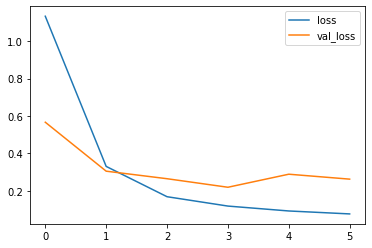

In [ ]:
history_bidir_lstm = pd.DataFrame(model_bidir_lstm.history.history)
history_bidir_lstm [['loss', 'val_loss']].plot.line()

accuracy_score: 0.9085


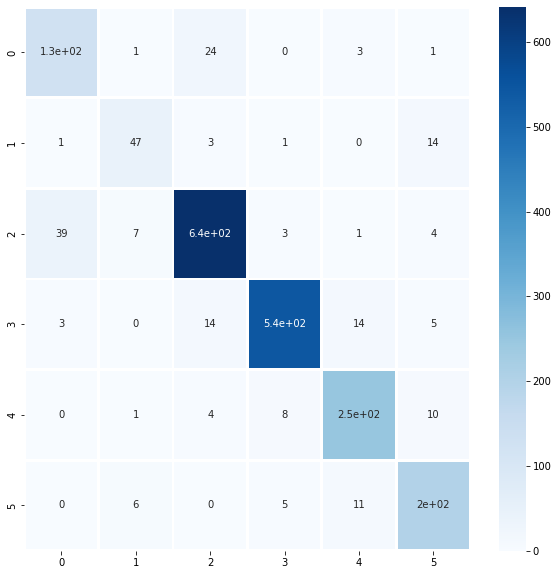

In [ ]:
pred_bidir_lstm = np.argmax(model_bidir_lstm.predict(padding_test), -1)
print(f'accuracy_score: {metrics.accuracy_score(output_test, pred_bidir_lstm)}')
plt.figure(figsize=(10,10))


sn.heatmap(metrics.confusion_matrix(output_test, pred_bidir_lstm), cmap='Blues', annot=True, linewidths=2)

###LSTM

In [ ]:
tf.keras.backend.clear_session()
model_lstm = tf.keras.Sequential([
      tf.keras.layers.Embedding(input_dim=voc+1,output_dim=64,mask_zero=True,
                                                       input_shape=[None]),
      tf.keras.layers.SpatialDropout1D(0.4),
      tf.keras.layers.LSTM(128,return_sequences=True),
      tf.keras.layers.LSTM(128),
      tf.keras.layers.Dense(6,activation='softmax')

])

model_lstm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 64)          640064    
                                                                 
 spatial_dropout1d (SpatialD  (None, None, 64)         0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, None, 128)         98816     
                                                                 
 lstm_1 (LSTM)               (None, 128)               131584    
                                                                 
 dense (Dense)               (None, 6)                 774       
                                                                 
Total params: 871,238
Trainable params: 871,238
Non-trainable params: 0
__________________________________________________

In [ ]:
bestlstm_model=tf.keras.callbacks.ModelCheckpoint('/content/drive/MyDrive/My_Models/ModelLstm_Mohammed_Maher.h5',
                                                monitor='val_acc',
                                                save_best_only=True)

model_lstm.compile(optimizer=tf.optimizers.Adam(),
                  loss=tf.losses.SparseCategoricalCrossentropy(),
                  metrics=['acc'])
model_lstm.fit(datatrain,epochs=6,validation_data=datatest,callbacks=[bestlstm_model])


Epoch 1/6
250/250 [==============================] - 25s 59ms/step - loss: 1.3026 - acc: 0.4868 - val_loss: 0.7115 - val_acc: 0.7700
Epoch 2/6
250/250 [==============================] - 12s 47ms/step - loss: 0.4534 - acc: 0.8476 - val_loss: 0.2804 - val_acc: 0.9005
Epoch 3/6
250/250 [==============================] - 12s 48ms/step - loss: 0.2224 - acc: 0.9243 - val_loss: 0.2333 - val_acc: 0.9095
Epoch 4/6
250/250 [==============================] - 12s 48ms/step - loss: 0.1578 - acc: 0.9427 - val_loss: 0.2282 - val_acc: 0.9105
Epoch 5/6
250/250 [==============================] - 12s 47ms/step - loss: 0.1305 - acc: 0.9505 - val_loss: 0.2393 - val_acc: 0.9165
Epoch 6/6
250/250 [==============================] - 12s 50ms/step - loss: 0.1088 - acc: 0.9618 - val_loss: 0.2234 - val_acc: 0.9175


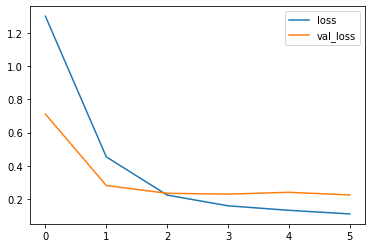

In [ ]:
history_model_lstm = pd.DataFrame(model_lstm.history.history)
history_model_lstm[['loss', 'val_loss']].plot.line()

accuracy_score: 0.9175


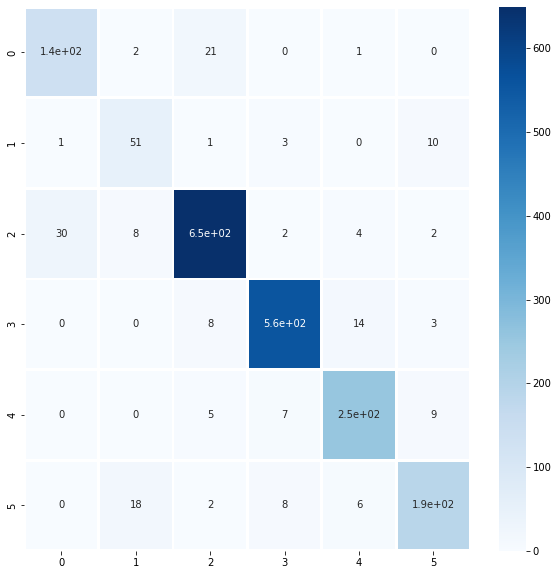

In [ ]:
pred_model_lstm = np.argmax(model_lstm.predict(padding_test), -1)
print(f'accuracy_score: {metrics.accuracy_score(output_test, pred_model_lstm)}')
plt.figure(figsize=(10,10))


sn.heatmap(metrics.confusion_matrix(output_test, pred_model_lstm), cmap='Blues', annot=True, linewidths=2)

##GRU

###Bi-GRU

In [ ]:
tf.keras.backend.clear_session()
model_bidir_gru = tf.keras.Sequential([
                             tf.keras.layers.Embedding(input_dim=voc+1,output_dim=64,mask_zero=True,
                                                       input_shape=[None]),
                             tf.keras.layers.Bidirectional( tf.keras.layers.GRU(units=300,return_sequences=True)),
                             tf.keras.layers.GRU(200,return_sequences=True),
                             tf.keras.layers.GRU(300),
                             tf.keras.layers.Dense(6,activation='softmax')

                             

])
model_bidir_gru.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 64)          640064    
                                                                 
 bidirectional (Bidirectiona  (None, None, 600)        658800    
 l)                                                              
                                                                 
 gru_1 (GRU)                 (None, None, 200)         481200    
                                                                 
 gru_2 (GRU)                 (None, 300)               451800    
                                                                 
 dense (Dense)               (None, 6)                 1806      
                                                                 
Total params: 2,233,670
Trainable params: 2,233,670
Non-trainable params: 0
______________________________________________

In [ ]:
bestbidir_gru_model=tf.keras.callbacks.ModelCheckpoint('/content/drive/MyDrive/My_Models/ModelBiGru_Mohammed_Maher.h5',
                                                monitor='val_acc',
                                                save_best_only=True)

model_bidir_gru.compile(optimizer=tf.optimizers.Adam(),
                  loss=tf.losses.SparseCategoricalCrossentropy(),
                  metrics=['acc'])
model_bidir_gru.fit(datatrain,epochs=6,validation_data=datatest,callbacks=[bestbidir_gru_model])


Epoch 1/6
250/250 [==============================] - 49s 119ms/step - loss: 1.0556 - acc: 0.5899 - val_loss: 0.2925 - val_acc: 0.8975
Epoch 2/6
250/250 [==============================] - 22s 90ms/step - loss: 0.1933 - acc: 0.9279 - val_loss: 0.1824 - val_acc: 0.9240
Epoch 3/6
250/250 [==============================] - 21s 84ms/step - loss: 0.1134 - acc: 0.9529 - val_loss: 0.2044 - val_acc: 0.9200
Epoch 4/6
250/250 [==============================] - 22s 87ms/step - loss: 0.0836 - acc: 0.9654 - val_loss: 0.1893 - val_acc: 0.9245
Epoch 5/6
250/250 [==============================] - 21s 84ms/step - loss: 0.0720 - acc: 0.9719 - val_loss: 0.2250 - val_acc: 0.9165
Epoch 6/6
250/250 [==============================] - 22s 86ms/step - loss: 0.0608 - acc: 0.9746 - val_loss: 0.2514 - val_acc: 0.9210


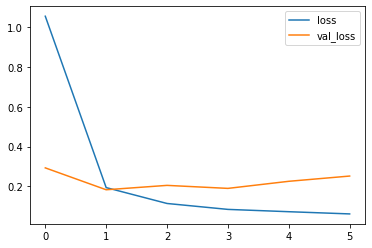

In [ ]:
history_bidir_gru = pd.DataFrame(model_bidir_gru.history.history)
history_bidir_gru[['loss', 'val_loss']].plot.line()

accuracy_score: 0.921


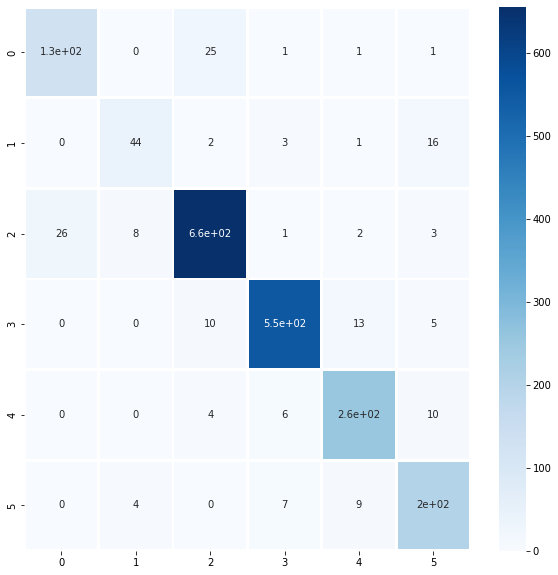

In [ ]:
pred_bidir_gru = np.argmax(model_bidir_gru.predict(padding_test), -1)
print(f'accuracy_score: {metrics.accuracy_score(output_test, pred_bidir_gru)}')
plt.figure(figsize=(10,10))


sn.heatmap(metrics.confusion_matrix(output_test, pred_bidir_gru), cmap='Blues', annot=True, linewidths=2)

###GRU

In [ ]:
tf.keras.backend.clear_session()
model_gru = tf.keras.Sequential([
                             tf.keras.layers.Embedding(input_dim=voc+1,output_dim=64,mask_zero=True,
                                                       input_shape=[None]),
                             tf.keras.layers.GRU(128,return_sequences=True),
                             tf.keras.layers.GRU(128),
                             tf.keras.layers.Dense(6,activation='softmax')

                             

])
model_gru.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 64)          640064    
                                                                 
 gru (GRU)                   (None, None, 128)         74496     
                                                                 
 gru_1 (GRU)                 (None, 128)               99072     
                                                                 
 dense (Dense)               (None, 6)                 774       
                                                                 
Total params: 814,406
Trainable params: 814,406
Non-trainable params: 0
_________________________________________________________________


In [ ]:
bestgru_model=tf.keras.callbacks.ModelCheckpoint('/content/drive/MyDrive/My_Models/ModelGru_Mohammed_Maher.h5',
                                                monitor='val_acc',
                                                save_best_only=True)

model_gru.compile(optimizer=tf.optimizers.Adam(),
                  loss=tf.losses.SparseCategoricalCrossentropy(),
                  metrics=['acc'])
model_gru.fit(datatrain,epochs=6,validation_data=datatest,callbacks=[bestgru_model])


Epoch 1/6
250/250 [==============================] - 24s 55ms/step - loss: 1.1055 - acc: 0.5796 - val_loss: 0.4313 - val_acc: 0.8550
Epoch 2/6
250/250 [==============================] - 10s 42ms/step - loss: 0.2433 - acc: 0.9147 - val_loss: 0.2180 - val_acc: 0.9140
Epoch 3/6
250/250 [==============================] - 10s 39ms/step - loss: 0.1143 - acc: 0.9535 - val_loss: 0.2349 - val_acc: 0.9135
Epoch 4/6
250/250 [==============================] - 10s 42ms/step - loss: 0.0864 - acc: 0.9631 - val_loss: 0.2207 - val_acc: 0.9185
Epoch 5/6
250/250 [==============================] - 10s 39ms/step - loss: 0.0685 - acc: 0.9727 - val_loss: 0.2720 - val_acc: 0.9100
Epoch 6/6
250/250 [==============================] - 10s 39ms/step - loss: 0.0660 - acc: 0.9735 - val_loss: 0.2627 - val_acc: 0.9120


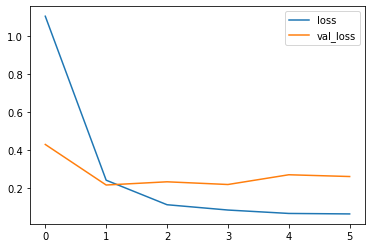

In [ ]:
history_gru = pd.DataFrame(model_gru.history.history)
history_gru[['loss', 'val_loss']].plot.line()

accuracy_score: 0.912


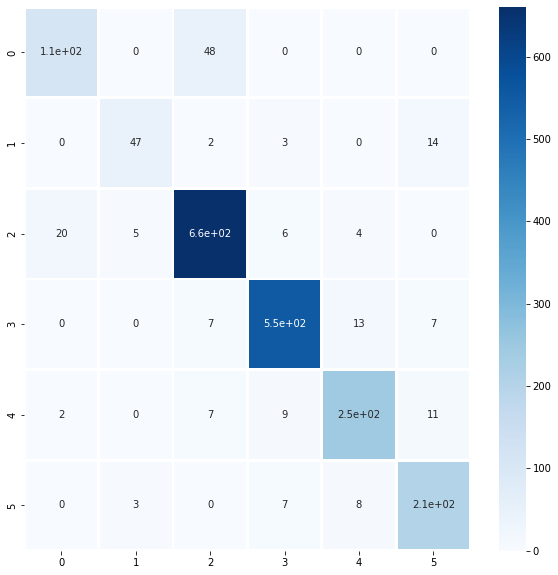

In [ ]:
pred_model_gru = np.argmax(model_gru.predict(padding_test), -1)
print(f'accuracy_score: {metrics.accuracy_score(output_test, pred_model_gru)}')
plt.figure(figsize=(10,10))


sn.heatmap(metrics.confusion_matrix(output_test, pred_model_gru), cmap='Blues', annot=True, linewidths=2)

###GRU-model2

In [ ]:
tf.keras.backend.clear_session()
model_gru2 = tf.keras.Sequential([
                             tf.keras.layers.Embedding(input_dim=voc+1,output_dim=64,mask_zero=True,
                                                       input_shape=[None]),
                             tf.keras.layers.GRU(300,return_sequences=True),
                             tf.keras.layers.GRU(200),
                             tf.keras.layers.Dense(6,activation='softmax')

                             

])
model_gru2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 64)          640064    
                                                                 
 gru (GRU)                   (None, None, 300)         329400    
                                                                 
 gru_1 (GRU)                 (None, 200)               301200    
                                                                 
 dense (Dense)               (None, 6)                 1206      
                                                                 
Total params: 1,271,870
Trainable params: 1,271,870
Non-trainable params: 0
_________________________________________________________________


In [ ]:
bestgru2_model=tf.keras.callbacks.ModelCheckpoint('/content/drive/MyDrive/My_Models/Gru2Model_Mohammed_Maher.h5',
                                                monitor='val_acc',
                                                save_best_only=True)

model_gru2.compile(optimizer=tf.optimizers.Adam(),
                  loss=tf.losses.SparseCategoricalCrossentropy(),
                  metrics=['acc'])
model_gru2.fit(datatrain,epochs=6,validation_data=datatest,callbacks=[bestgru2_model])


Epoch 1/6
250/250 [==============================] - 29s 80ms/step - loss: 1.0349 - acc: 0.6029 - val_loss: 0.2754 - val_acc: 0.9025
Epoch 2/6
250/250 [==============================] - 15s 58ms/step - loss: 0.1821 - acc: 0.9290 - val_loss: 0.1774 - val_acc: 0.9250
Epoch 3/6
250/250 [==============================] - 15s 60ms/step - loss: 0.0959 - acc: 0.9576 - val_loss: 0.1766 - val_acc: 0.9270
Epoch 4/6
250/250 [==============================] - 13s 52ms/step - loss: 0.0716 - acc: 0.9685 - val_loss: 0.2826 - val_acc: 0.9160
Epoch 5/6
250/250 [==============================] - 14s 54ms/step - loss: 0.0719 - acc: 0.9701 - val_loss: 0.2255 - val_acc: 0.9190
Epoch 6/6
250/250 [==============================] - 14s 55ms/step - loss: 0.0539 - acc: 0.9776 - val_loss: 0.2543 - val_acc: 0.9170


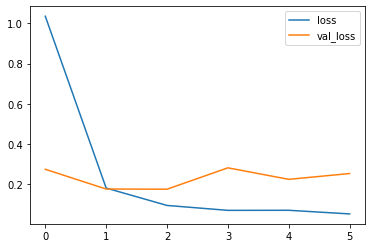

In [ ]:
history_gru2 = pd.DataFrame(model_gru2.history.history)
history_gru2[['loss', 'val_loss']].plot.line()

accuracy_score: 0.917


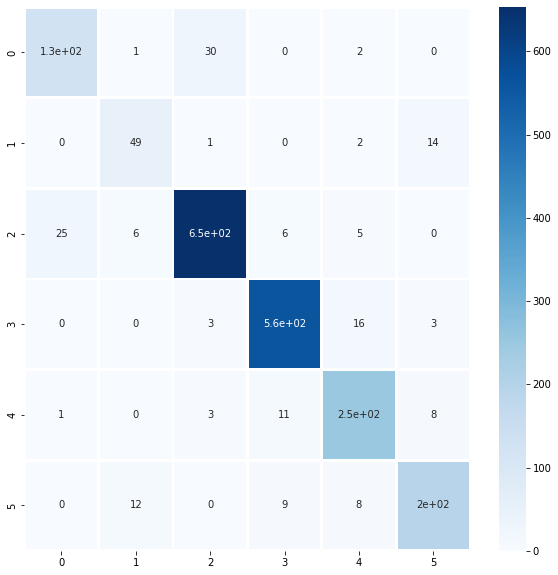

In [ ]:
pred_model_gru2 = np.argmax(model_gru2.predict(padding_test), -1)
print(f'accuracy_score: {metrics.accuracy_score(output_test, pred_model_gru2)}')
plt.figure(figsize=(10,10))


sn.heatmap(metrics.confusion_matrix(output_test, pred_model_gru2), cmap='Blues', annot=True, linewidths=2)

#7-Evaluation Model 

In [ ]:
models_list = glob.glob('/content/drive/MyDrive/My_Models'+'/*.h5')
models_list

['/content/drive/MyDrive/My_Models/ModelDnn_Mohammed_Maher.h5',
 '/content/drive/MyDrive/My_Models/ModelRnn_Mohammed_Maher.h5',
 '/content/drive/MyDrive/My_Models/ModeldeepRnn_Mohammed_Maher.h5',
 '/content/drive/MyDrive/My_Models/ModelBiLstm_Mohammed_Maher.h5',
 '/content/drive/MyDrive/My_Models/ModelLstm_Mohammed_Maher.h5',
 '/content/drive/MyDrive/My_Models/ModelBiGru_Mohammed_Maher.h5',
 '/content/drive/MyDrive/My_Models/ModelGru_Mohammed_Maher.h5',
 '/content/drive/MyDrive/My_Models/Gru2Model_Mohammed_Maher.h5']

In [ ]:
high_val_acc = 0.0
best_model_index = 0

for index, model_path in enumerate(models_list):

  model = tf.keras.models.load_model(model_path)
  [val_loss, val_acc] = model.evaluate(padding_test, output_test)

  if val_acc > high_val_acc:
    high_val_acc = val_acc
    best_model_index = index

  print(model_path)
  print(f'val_loss: {val_loss} , val_acc: {val_acc}')
  print('-'*50)
  

best_model_path = models_list[best_model_index]

63/63 [==============================] - 0s 3ms/step - loss: 0.5518 - acc: 0.8605
/content/drive/MyDrive/My_Models/ModelDnn_Mohammed_Maher.h5
val_loss: 0.5518365502357483 , val_acc: 0.8604999780654907
--------------------------------------------------
63/63 [==============================] - 1s 12ms/step - loss: 0.6711 - acc: 0.8115
/content/drive/MyDrive/My_Models/ModelRnn_Mohammed_Maher.h5
val_loss: 0.6710658073425293 , val_acc: 0.8115000128746033
--------------------------------------------------
63/63 [==============================] - 2s 19ms/step - loss: 0.5919 - acc: 0.8075
/content/drive/MyDrive/My_Models/ModeldeepRnn_Mohammed_Maher.h5
val_loss: 0.5919255614280701 , val_acc: 0.8075000047683716
--------------------------------------------------
63/63 [==============================] - 8s 34ms/step - loss: 0.2183 - acc: 0.9210
/content/drive/MyDrive/My_Models/ModelBiLstm_Mohammed_Maher.h5
val_loss: 0.2182532250881195 , val_acc: 0.9210000038146973
---------------------------------

In [ ]:
print(f'The best model is:\n{best_model_path}')

The best model is:
/content/drive/MyDrive/My_Models/Gru2Model_Mohammed_Maher.h5


In [ ]:
def predict(text):
  best_model = tf.keras.models.load_model(best_model_path)

  tokenized_texts = text_tok.texts_to_sequences([text])
  input = tf.keras.preprocessing.sequence.pad_sequences(tokenized_texts, maxlen=64, padding='post')

  output = best_model.predict(input)
  label=[]
  for index in indx_label_output:
    label.append(indx_label_output[index])
  value_emoji=label
    
  print(value_emoji[np.argmax(output) ])

In [ ]:
input_text = "We had such a lovely dinner tonight"
predict(input_text)

😍


In [ ]:
input_text = "she is kind and pretty girl"
predict(input_text)

😢
